<a href="https://colab.research.google.com/github/haziquddin/ML_lab_work_48/blob/main/ML_lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [2]:
import pandas as pd 
data = pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [13]:
from sklearn.model_selection import train_test_split
X= data[['Age','Sex',	'BP',	'Cholesterol'	,'Na_to_K']].values  
y= data[['Drug']].values  

In [14]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
X[:,1] = sex.transform(X[:,1])

BP = preprocessing.LabelEncoder()
BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = BP.transform(X[:,2])

Cholesterol = preprocessing.LabelEncoder()
Cholesterol.fit(['NORMAL','HIGH'])
X[:,3] = Cholesterol.transform(X[:,3])

In [19]:
x_train, x_test, y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state= 1)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9666666666666667


In [22]:
from six import StringIO
import pydotplus
import matplotlib.image as mping
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree

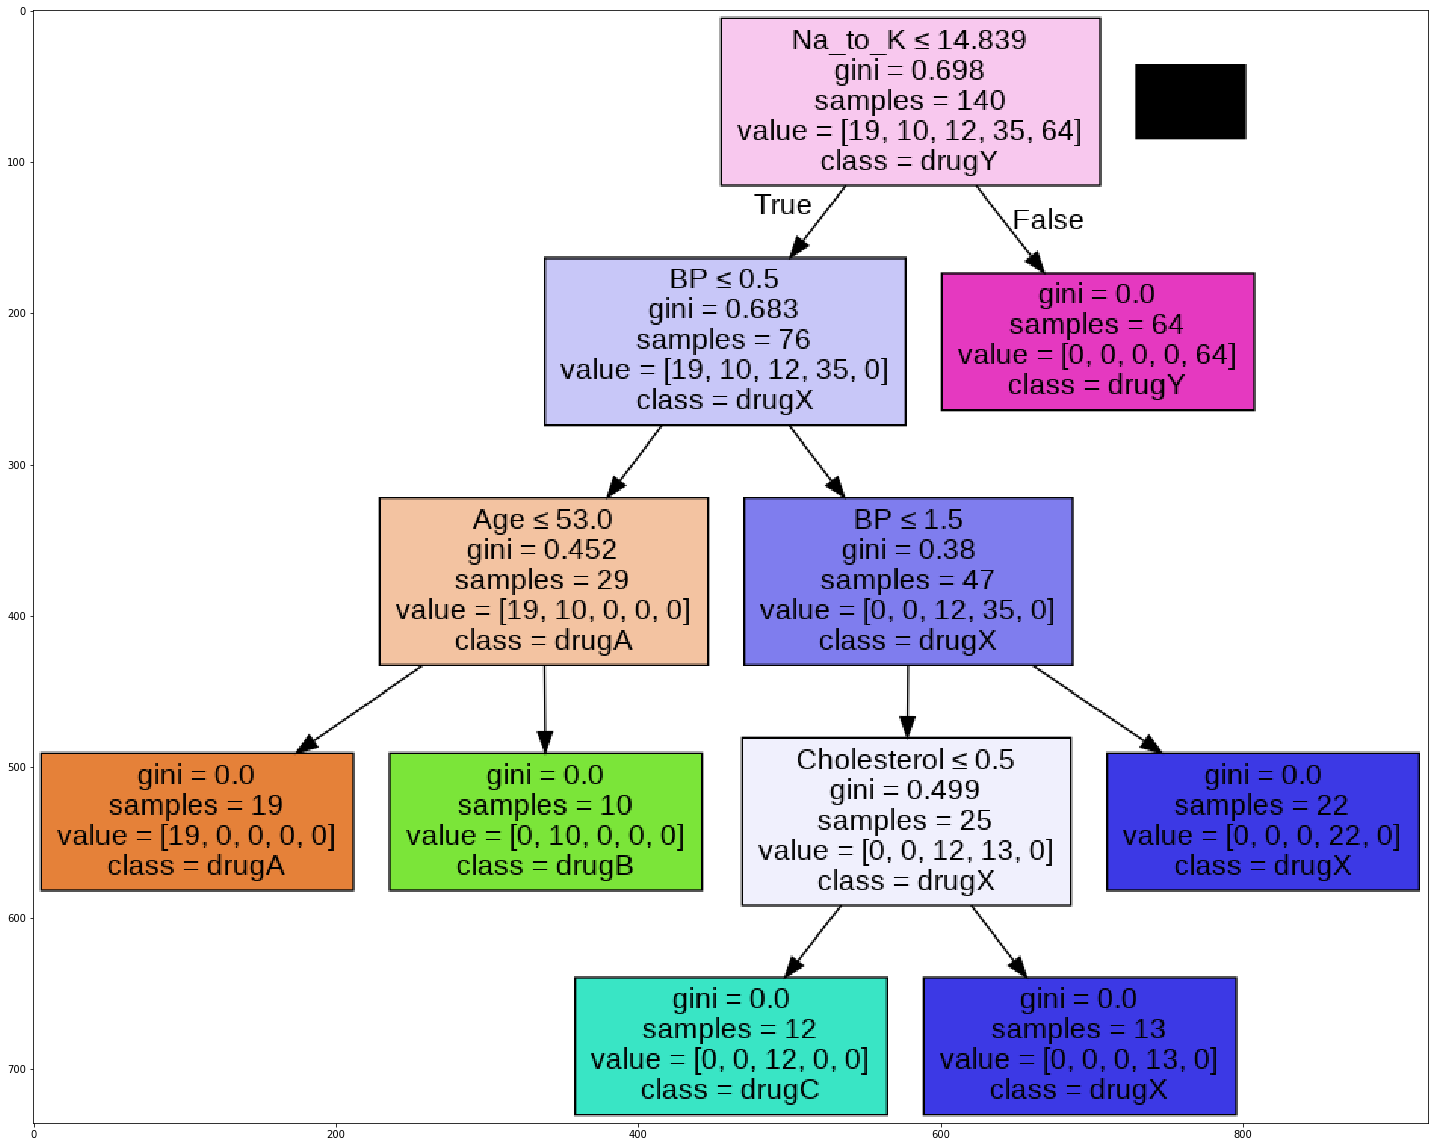

In [23]:
dot_data = StringIO()
filename = "plot.png"
featureNames = data.columns[0:5]
targetNames = data["Drug"].unique().tolist()
out = tree.export_graphviz(classifier,feature_names = featureNames,out_file = dot_data,class_names=np.unique(y_train),filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mping.imread(filename)
plt.figure(figsize=(25,50))
plt.imshow(img,interpolation='nearest')

In [24]:
classifier = DecisionTreeClassifier(criterion = "entropy",max_depth = 3)
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9


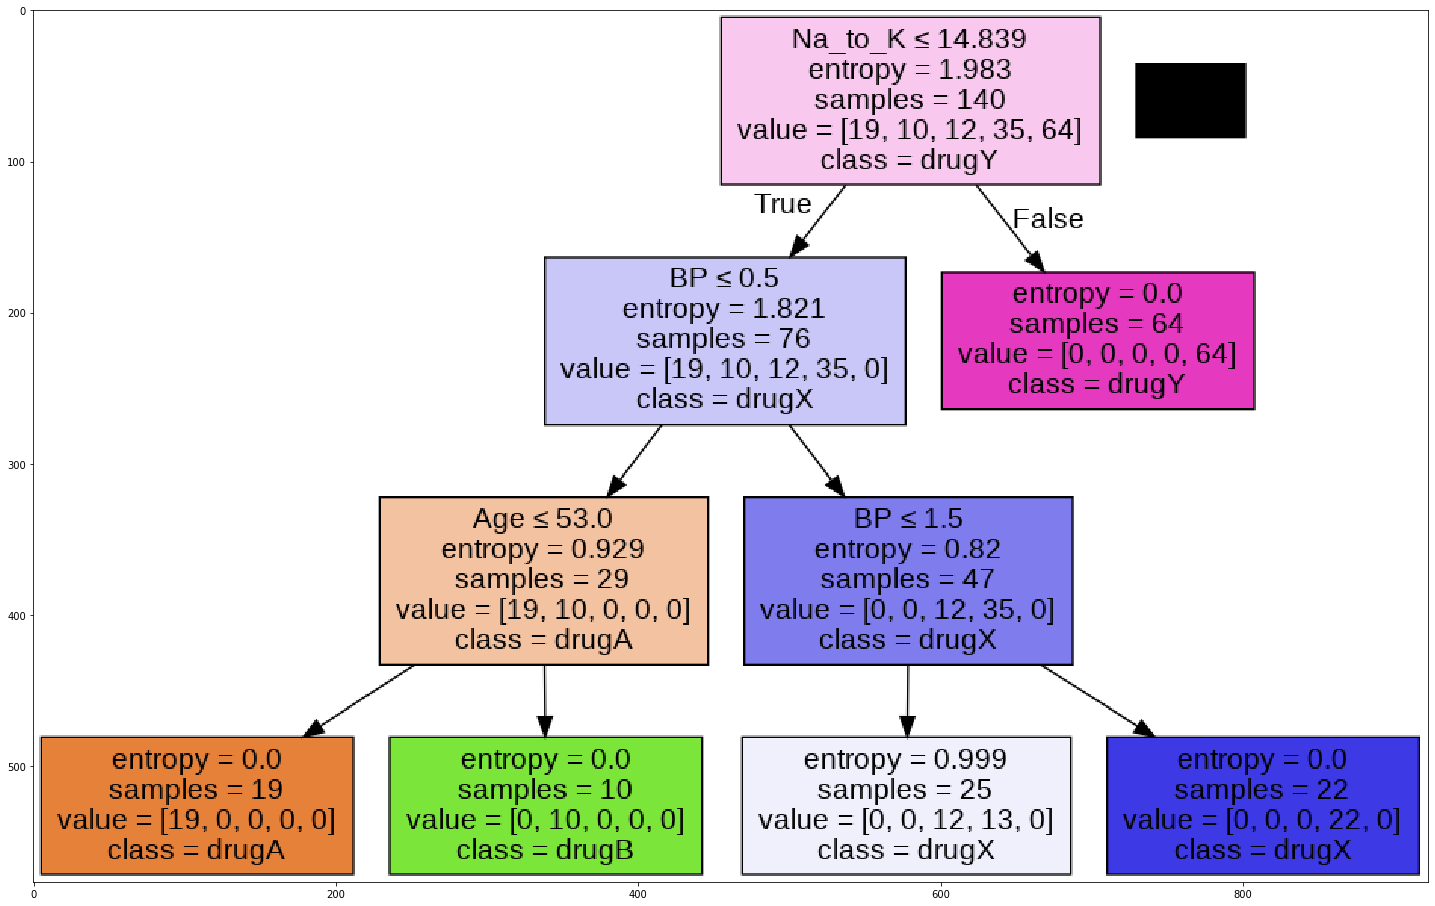

In [25]:
dot_data = StringIO()
filename = "plot.png"
featureNames = data.columns[0:5]
targetNames = data["Drug"].unique().tolist()
out = tree.export_graphviz(classifier,feature_names = featureNames,out_file = dot_data,class_names=np.unique(y_train),filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mping.imread(filename)
plt.figure(figsize=(25,50))
plt.imshow(img,interpolation='nearest')